In [1]:
!pip install -qU langchain-community faiss-cpu langchain-google-genai PyMuPDF langchain-groq langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.4/131.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.0/444.0 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9

# Vector Database with Faiss

In [31]:
from google.colab import userdata
GEMINI = userdata.get('GEMINI')

In [32]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
import os

os.environ["GOOGLE_API_KEY"] = GEMINI

embeddings = GoogleGenerativeAIEmbeddings(model="models/text-embedding-004")

In [33]:
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import FAISS

index = faiss.IndexFlatL2(len(embeddings.embed_query("hello world"))) #untuk mendapatkan length vectornya

# initiate Faiss VectorDB
vector_store = FAISS(
    embedding_function=embeddings,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

In [34]:
# store document to the vector database

from uuid import uuid4

from langchain_core.documents import Document

document_1 = Document(
    page_content="I had chocalate chip pancakes and scrambled eggs for breakfast this morning.",
    metadata={"source": "tweet"},
)

document_2 = Document(
    page_content="The weather forecast for tomorrow is cloudy and overcast, with a high of 62 degrees.",
    metadata={"source": "news"},
)

document_3 = Document(
    page_content="Building an exciting new project with LangChain - come check it out!",
    metadata={"source": "tweet"},
)

document_4 = Document(
    page_content="Robbers broke into the city bank and stole $1 million in cash.",
    metadata={"source": "news"},
)

document_5 = Document(
    page_content="Wow! That was an amazing movie. I can't wait to see it again.",
    metadata={"source": "tweet"},
)

document_6 = Document(
    page_content="Is the new iPhone worth the price? Read this review to find out.",
    metadata={"source": "website"},
)

document_7 = Document(
    page_content="The top 10 soccer players in the world right now.",
    metadata={"source": "website"},
)

document_8 = Document(
    page_content="LangGraph is the best framework for building stateful, agentic applications!",
    metadata={"source": "tweet"},
)

document_9 = Document(
    page_content="The stock market is down 500 points today due to fears of a recession.",
    metadata={"source": "news"},
)

document_10 = Document(
    page_content="I have a bad feeling I am going to get deleted :(",
    metadata={"source": "tweet"},
)

documents = [
    document_1,
    document_2,
    document_3,
    document_4,
    document_5,
    document_6,
    document_7,
    document_8,
    document_9,
    document_10,
]
uuids = [str(uuid4()) for _ in range(len(documents))]

vector_store.add_documents(documents=documents, ids=uuids)

['a9833cf4-ff32-448b-b675-cdda09a33676',
 '424051e0-20ab-483a-8abd-b6b7983172bf',
 'bab0565f-089a-448d-9852-bef0f802ade8',
 'df948eb3-209d-4654-ad50-a49aae10c5a0',
 'e92bce99-8123-487f-983f-a456bd0872dd',
 'e7262e86-59ef-49f3-ac04-36099af19d69',
 'fefaaa9b-f4e7-4cff-b7aa-5e18f830d968',
 '6f5cc741-7d14-4d89-a261-1f3c65055178',
 'e0074f81-0a21-44e8-8efb-d90425b7c984',
 '9ffeec3d-4c2d-48b8-a2bb-b7615b05425b']

## Melakukan pencarian di FaissDB

Operator yang didukung untuk melakukan filtering adalah sebagai berikut:

- $eq (equals)

- $neq (not equals)

- $gt (greater than)

- $lt (less than)

- $gte (greater than or equal)

- $lte (less than or equal)

- $in (membership in list)

- $nin (not in list)

- $and (all conditions must match)

- $or (any condition must match)

- $not (negation of condition)

In [35]:
results = vector_store.similarity_search(
    "LangChain provides abstractions to make working with LLMs easy",
    k=2,
    filter={"source": {"$eq": "tweet"}},
)
for res in results:
    print(f"* {res.page_content} [{res.metadata}]")

* LangGraph is the best framework for building stateful, agentic applications! [{'source': 'tweet'}]
* Building an exciting new project with LangChain - come check it out! [{'source': 'tweet'}]


In [36]:
results = vector_store.similarity_search(
    "The new iPhone",
    k=2,
)
for res in results:
    print(f"* {res.page_content} [{res.metadata}]")

* Is the new iPhone worth the price? Read this review to find out. [{'source': 'website'}]
* I have a bad feeling I am going to get deleted :( [{'source': 'tweet'}]


## Save the DB


In [37]:
vector_store.save_local("faiss_index")

## Load the DB

In [38]:
new_vector_store = FAISS.load_local(
    "faiss_index", embeddings, allow_dangerous_deserialization=True
)

docs = new_vector_store.similarity_search("qux")

In [39]:
for res in docs:
    print(f"* {res.page_content} [{res.metadata}]")

* I have a bad feeling I am going to get deleted :( [{'source': 'tweet'}]
* Wow! That was an amazing movie. I can't wait to see it again. [{'source': 'tweet'}]
* Building an exciting new project with LangChain - come check it out! [{'source': 'tweet'}]
* I had chocalate chip pancakes and scrambled eggs for breakfast this morning. [{'source': 'tweet'}]


# RAG dengan LangChain

In [40]:
from langchain.text_splitter import CharacterTextSplitter
from langchain_core.documents import Document
import fitz


### Langkah 1: Extract document dan chunk dokumen
Chunk ini dilakukan untuk mengubah dokumen yang panjang menjadi bagian bagian kecil sehingga text yang diterima LLM lebih sedikit. Tujuannya adalah karena adanya batasan token yang diberikan oleh LLM, selain itu semakin panjang text yang diterima oleh LLM semakin lama pula respons yang diberikan oleh LLM.

In [41]:
def extract_text_from_pdf(pdf_path):
    """Mengekstrak teks dari PDF"""
    doc = fitz.open(pdf_path)
    text = "\n".join([page.get_text() for page in doc])
    return text

pdf_text = extract_text_from_pdf("/content/Cryptography_Recent_Advances_and_Research_Perspect.pdf")

In [42]:
document = Document(
    page_content=pdf_text
)

In [43]:
splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=100,
    chunk_overlap=50
)

chunks = splitter.split_text(pdf_text) #you can also split documents using split_documents

In [44]:
# hasil chunk document

[chunk[:100] + '...' for chunk in chunks]

['Selection of our books indexed in the Book Citation Index \nin Web of Science™ Core Collection (BKCI)...',
 'in Web of Science™ Core Collection (BKCI)\nInterested in publishing with us?...',
 'Interested in publishing with us? \nContact book.department@intechopen.com...',
 'Contact book.department@intechopen.com\nNumbers displayed above are based on latest data collected....',
 'For more information visit www.intechopen.com\nOpen access books available\nCountries delivered to...',
 'Open access books available\nCountries delivered to\nContributors from top 500 universities...',
 'Contributors from top 500 universities\nInternational  authors and editors\nOur authors are among the...',
 'Our authors are among the\nmost cited scientists\nDownloads\nWe are IntechOpen,...',
 'most cited scientists\nDownloads\nWe are IntechOpen,\nthe world’s leading publisher of...',
 'the world’s leading publisher of\nOpen Access books\nBuilt by scientists, for scientists\n12.2%\n182,000...',
 'Built by 

### Langkah 2: Upload Chunked Documents ke Database

In [45]:
# inisialisasi faissdb

index = faiss.IndexFlatL2(len(embeddings.embed_query("hello world"))) #untuk mendapatkan length vectornya

# initiate Faiss VectorDB
vector_store = FAISS(
    embedding_function=embeddings,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

In [46]:
documents = [Document(page_content=chunk) for chunk in chunks]

In [47]:
uuids = [str(uuid4()) for _ in range(len(documents))]

vector_store.add_documents(documents=documents, ids=uuids)

['04af8375-26e4-4b21-b139-0ea401b9dd4a',
 '2205846f-20f0-4163-8138-a0daf26c0f15',
 '07f2dcc0-1922-4949-a3b0-76d14e230448',
 '06801bcd-d86d-457c-98c2-061fa690e331',
 'e4396faa-49bb-452d-b56d-f5433e68f40a',
 'f5909e46-5564-4069-a8b5-2cf4f8f8678f',
 'fae2faae-cc81-4a37-b9fb-19a0f52ac1c1',
 '629597c7-7c95-4d93-ae34-a24fa8939a75',
 'ad66a668-4424-4fc3-a8f6-6f5f14df5ff9',
 'f6e07ce9-e790-41b2-8d5f-cbfc6c0c3bf8',
 '63e78d29-4d44-47fa-a9b2-7d9a2d7a6d6b',
 'fb1e5194-34d5-4ffc-bc7a-ba85340a784c',
 '71e091cd-6a4c-4c6e-ac8a-2ec4168a1644',
 '77f7ace8-f7a7-495f-9724-6b0110e934b2',
 '00a996c5-ee71-4d4d-bdc1-d4e7c3683193',
 '8944e62b-b114-46cf-b2b8-0380c7f4d29b',
 'd5c10d0e-81a2-442c-ba69-d4bc0636cfdb',
 '1c45d42c-bde6-4fd5-b262-6142a546fc9f',
 '88a276c5-2329-4621-9a86-a6a7f2eb3874',
 'd06b5d4e-b6a6-41c4-aa5c-4ad83d34701c',
 'ab017b85-d001-4e24-80f3-880c84d6983b',
 '12fb6d92-8c9d-4e36-81b9-73a5e03fdaae',
 'c9113239-5039-4324-bbda-40a2d8c38a55',
 '1a2e305b-dfdc-4f41-9291-5826cc73bb36',
 '17cac1ff-a58e-

In [48]:
vector_store.save_local("faiss_cv_index")

### Langkah 3: Develop RAG

In [49]:
# Initialize State

from langchain_core.documents import Document
from typing_extensions import List, TypedDict
from langchain_groq import ChatGroq


class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

In [29]:
#initialize prompt

from langchain import hub

prompt = hub.pull("rlm/rag-prompt")

example_messages = prompt.invoke(
    {"context": "(context goes here)", "question": "(question goes here)"}
).to_messages()

assert len(example_messages) == 1
print(example_messages[0].content)

/usr/local/lib/python3.12/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: (question goes here) 
Context: (context goes here) 
Answer:


In [65]:
from google.colab import userdata
GROQ = userdata.get('GROQ')

In [66]:
# Initialize LLM

os.environ["GROQ_API_KEY"] = GROQ

MODEL = 'llama-3.3-70b-versatile'

llm = ChatGroq(
    temperature=0,
    model_name=MODEL
) # kamu bisa mengganti model menjadi gemini atau LLM lainnya

In [60]:
# buat logic untuk mengambil informasi dari faissdb dan men-generate jawaban

def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"])
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}

In [61]:
# intialize flow
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

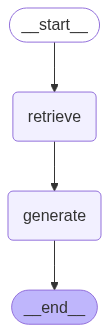

In [62]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [67]:
result = graph.invoke({"question": "What is Crypto?"})

print(f'Context: {result["context"]}\n\n')
print(f'Answer: {result["answer"]}')

Context: [Document(id='fe29de5c-71cb-4a08-93fe-5b741d058c33', metadata={}, page_content='detected.\nBlockchain technology also employs public-key cryptography, which is a crypto-'), Document(id='44c1649d-6512-4ea4-a9ae-019f1c0db753', metadata={}, page_content='cryptography, we can better protect our digital assets and maintain the privacy and'), Document(id='30dbb4a7-a3cb-4c22-9f16-b1999fbcd817', metadata={}, page_content='dential communication. With the rise of the internet and mobile technology, cryptogra-'), Document(id='c9113239-5039-4324-bbda-40a2d8c38a55', metadata={}, page_content='future of encryption technology.')]


Answer: Crypto refers to cryptography, which is a method of protecting digital assets and maintaining privacy through encryption. It involves the use of public-key cryptography, a key component of blockchain technology. Crypto is essentially a way to secure and protect confidential communication and data.


In [69]:
result = graph.invoke({"question": "What the point of Cryptocurrency?"})
print(f'Answer: {result["answer"]}')

Answer: The point of cryptocurrency is to utilize cryptography and blockchain technology for secure communication and transactions. This allows for better protection of digital assets and maintenance of privacy in an interconnected world. The main goal is to enable secure and private transactions, making it a key part of the future of encryption technology.
